18287.0
0.0001388888888888889
Important frequency at  253.95833333333334   days
Frequency=  {0.00000005}
Important frequency at  1.0   days
Frequency=  {0.00001158}
Important frequency at  380.9583333333333   days
Frequency=  {0.00000003}
Important frequency at  761.9166666666666   days
Frequency=  {0.00000002}


/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_3107/4141453311.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_3107/4141453311.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=2, ncols=2)


Threshold freq=  {0.00002315}


<Figure size 640x480 with 0 Axes>

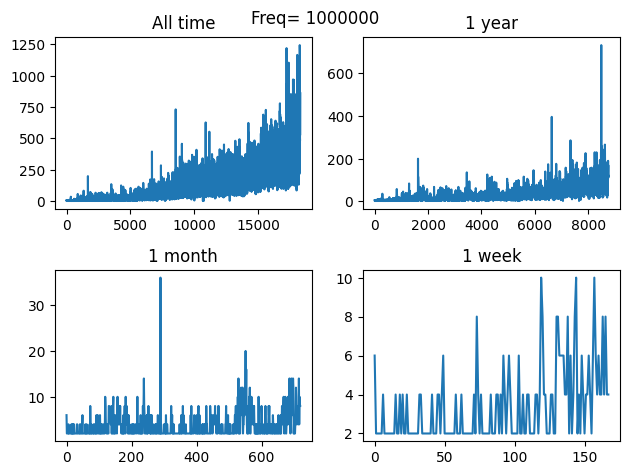

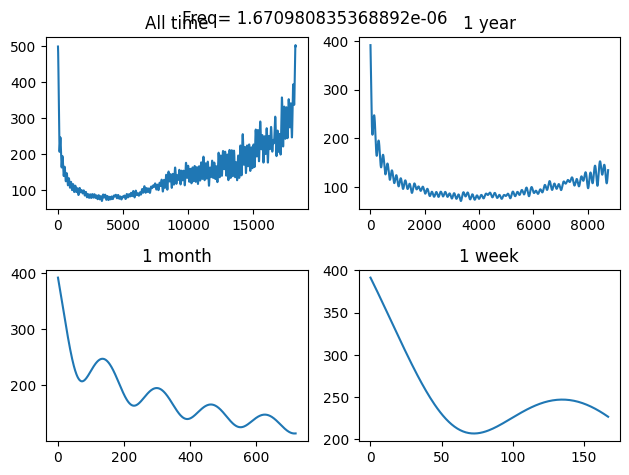

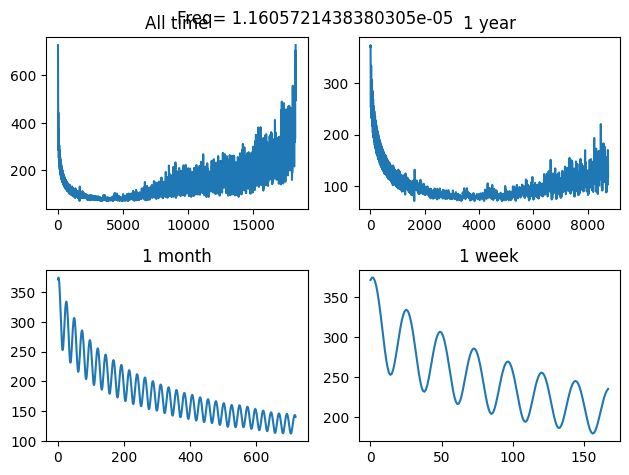

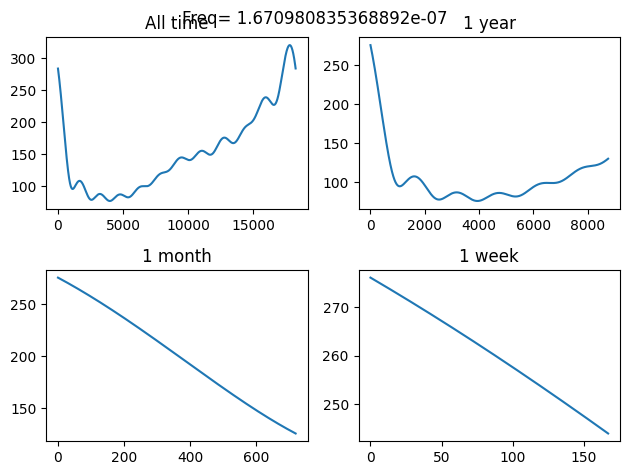

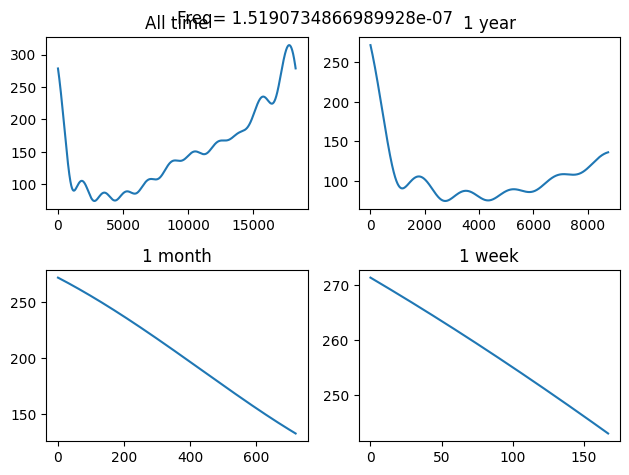

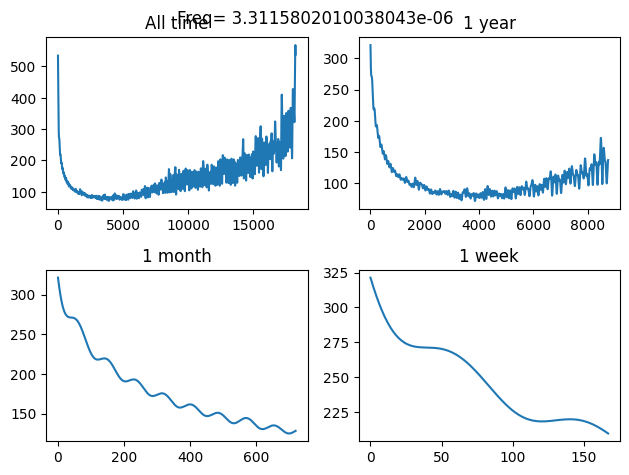

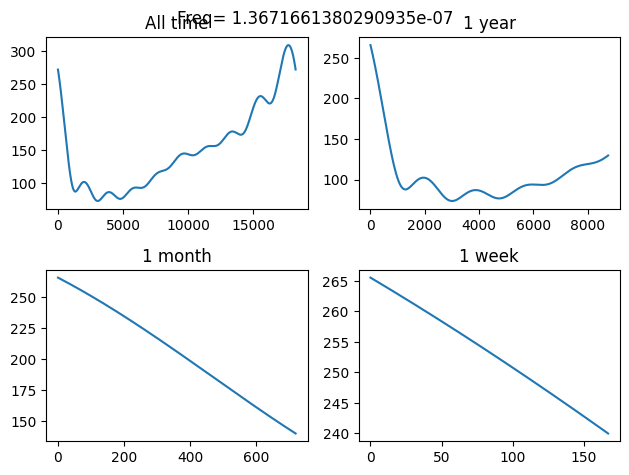

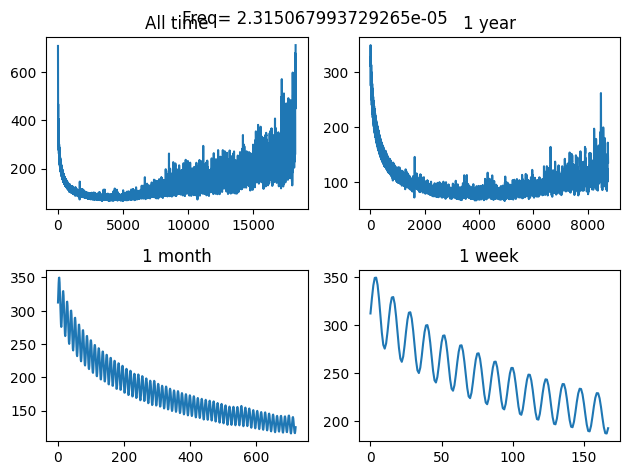

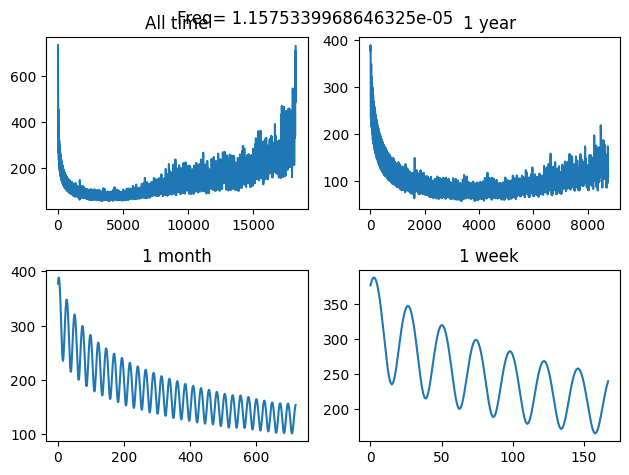

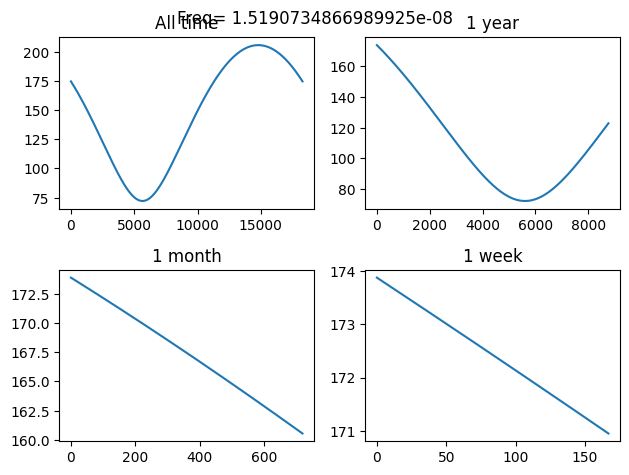

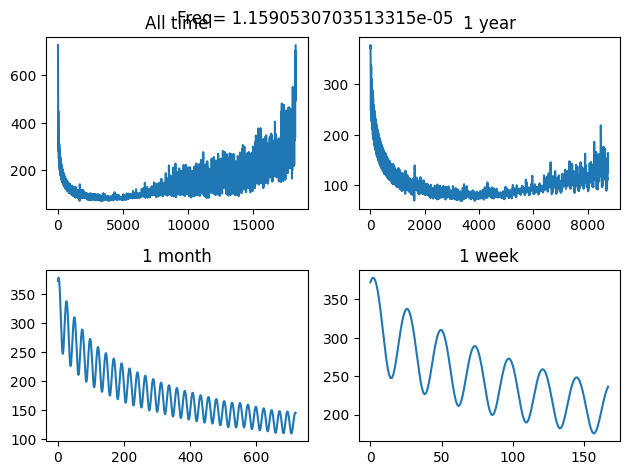

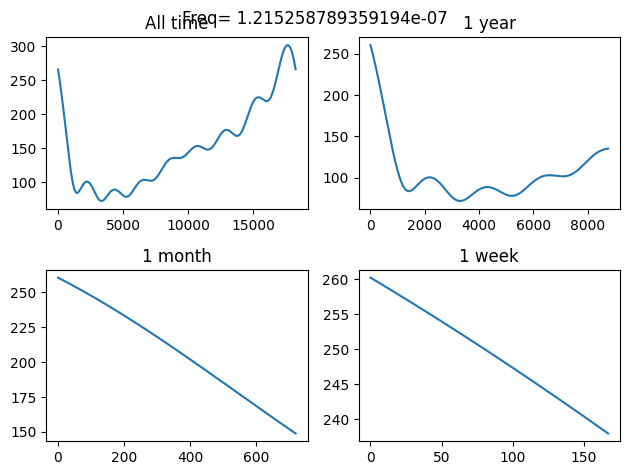

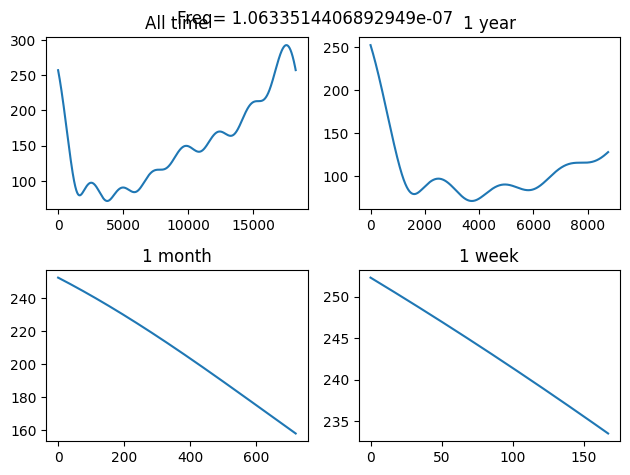

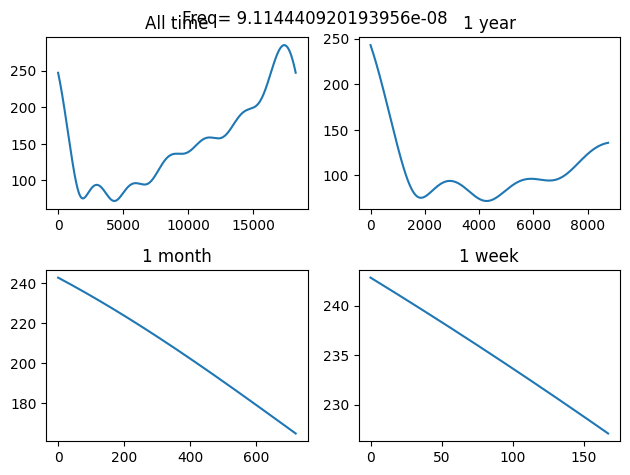

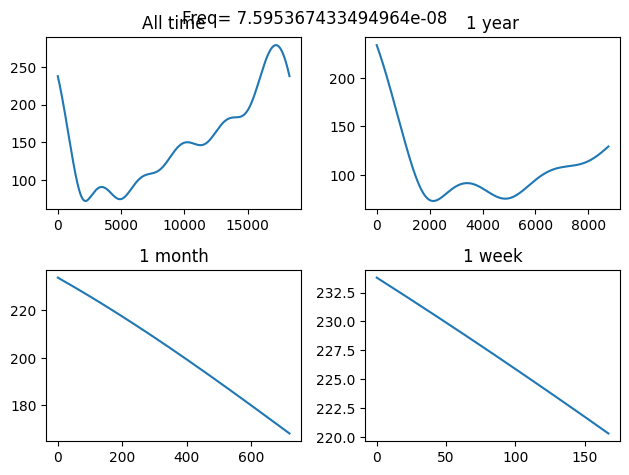

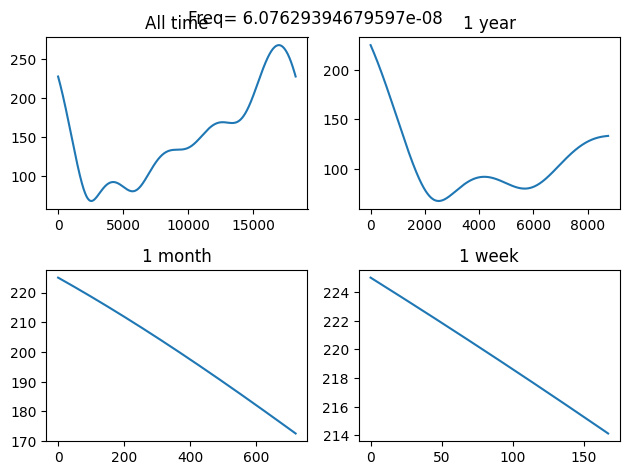

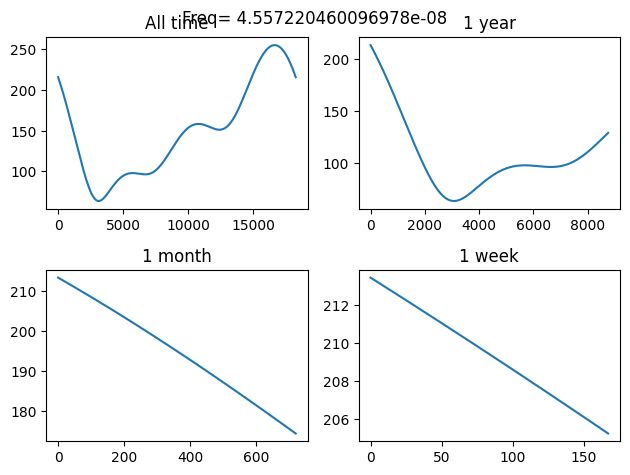

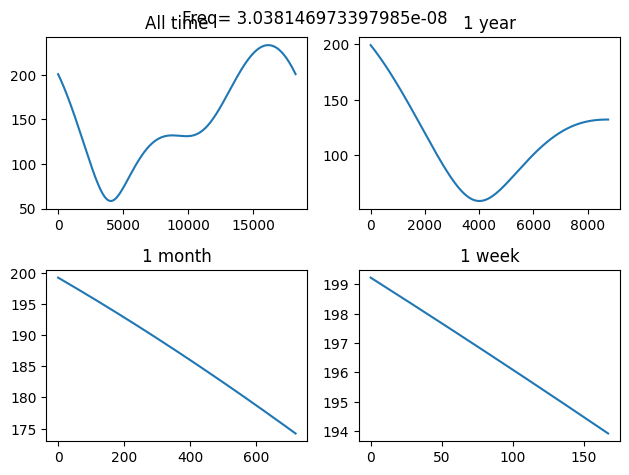

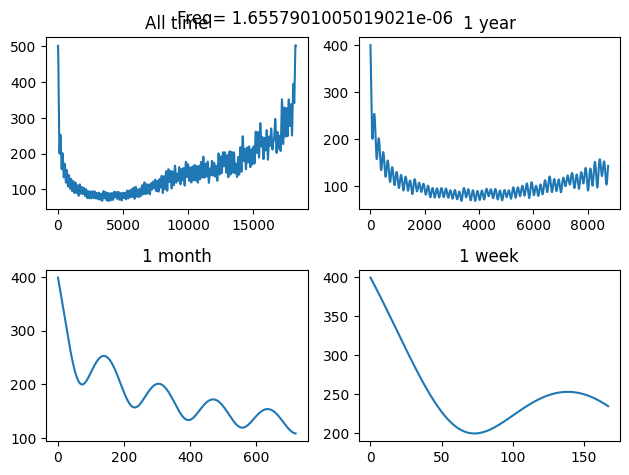

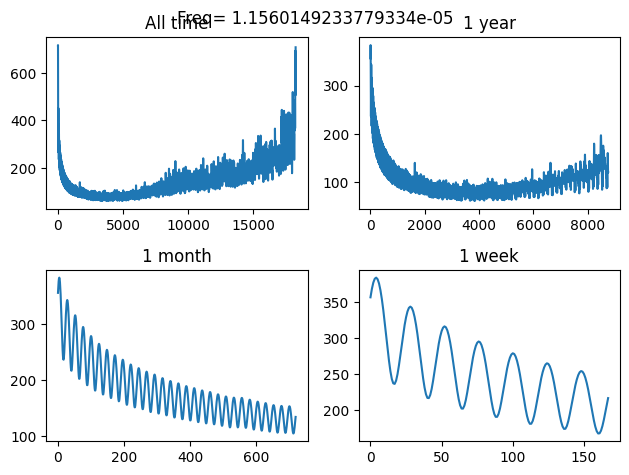

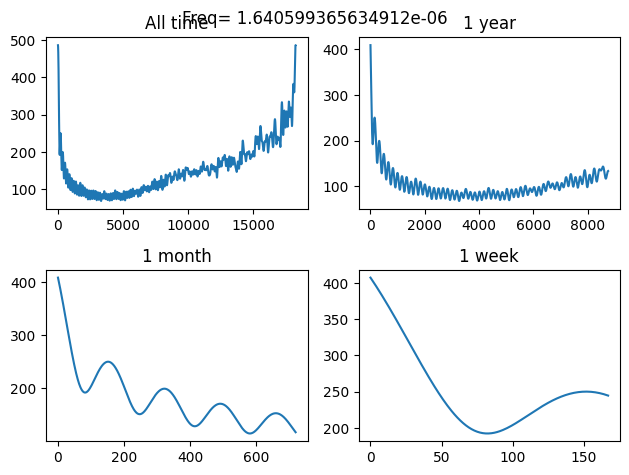

In [64]:
# ex1
# a)
# 1h = 3600s -> fs = 1 / 3600

ts = 3600
fs = 1 / 3600

# b)

import numpy as np

x = np.genfromtxt('Train.csv', delimiter=',')[1:][: , 2]

interval = (len(x) - 1) * ts # secunde
print(interval / 3600) # ore

# c)
max_freq = fs / 2 # 1 / 7200
print(max_freq)

# d)

N = len(x)
X = np.fft.fft(x)
X = np.abs(X / N)
X = X[: N // 2]

f = fs * np.linspace(0, N / 2, N //2) / N

import matplotlib.pyplot as plt
plt.plot(f, X)
plt.savefig("ex_d.pdf")
plt.clf()

# e)
# Prezinta o componenta continua deoarece magnitudinea 
# componentei de frecventa 0 este mai mare decat 0
x -= np.mean(x)
X = np.fft.fft(x)
X = np.abs(X / N)
X = X[: N // 2]

f = fs * np.linspace(0, N / 2, N //2) / N

# f)

max_components = f[np.argpartition(X, -4)[-4:]]

for m in max_components:

    _, hour = min(enumerate(range(1, 100000)), key=lambda x: abs(fs / x[1] - m))
    
    freq = fs / hour

    if np.abs(m - freq) <= 10 ** -8:
        print("Important frequency at ", hour / 24, " ", "days")
        print("Frequency= ", "{%.8f}" % m)
    

# apar 2 perioade notabile
# la 1 zi si la aproximativ 1 an
# celelalte 2 sunt la 253 zile si 761 zile

# g)

# punctul 48 reprezinta o zi de luni, ora 00:00 in csv
start = 48 + 7 * 24 * 8
plt.plot(range(start, start + 30 * 24), x[start : start + 30 * 24])
plt.savefig("ex_g.pdf")
plt.clf()

# h)
# Am putea sa urmarim semnalul 
# pentru o saptamana, o luna, un an 
# si sa cautam valori ce ies in evidenta
# care pot semala prezenta unui eveniment 
# special, precum o sarbatoare si asa am 
# putea aproxima data de inceput relativ
# la acest eveniment
# (evenimentul ar trebui sa fie periodic ca sa putem 
# aproxima corect)
# in acest fel putem gasi ziua si luna,
# dar probabil nu si anul

# i)

def filterComponents(x, freq):
    f = fs * np.linspace(0, N, N) / N
    X = np.fft.fft(x)
    X[f > freq] = 0    
    return np.abs(np.fft.ifft(X))

def plotFilteredSignal(c):
    x = np.genfromtxt('Train.csv', delimiter=',')[1:][: , 2]
    initialSignal = np.genfromtxt('Train.csv', delimiter=',')[1:][: , 2]
    
    x = filterComponents(x, c)
    
    start = 48

    fig, ax = plt.subplots(nrows=2, ncols=2)
    ax[0][0].plot(x)
    ax[0][0].title.set_text('All time')

    ax[0][1].plot(x[start : start + 365 * 24])
    ax[0][1].title.set_text('1 year')

    ax[1][0].plot(x[start : start + 30 * 24])
    ax[1][0].title.set_text('1 month')

    ax[1][1].plot(x[start : start + 7 * 24])
    ax[1][1].title.set_text('1 week')

    fig.tight_layout()
    fig.suptitle("Freq= {c}".format(c=c))
    fig.show()
    
    return np.dot(x.T - np.mean(x.T), initialSignal - np.mean(initialSignal)) / (np.linalg.norm(x) * np.linalg.norm(initialSignal))
    

corr_arr = []
plotFilteredSignal(1000000)
max_components = f[np.argpartition(X, -20)[-20:]]
for c in max_components:
    corr = plotFilteredSignal(c)
    corr_arr.append(corr)

corr_arr = np.array(corr_arr)
print("Threshold freq= ", "{%.8f}" % max_components[np.argmax(corr_arr)])
# 0.00002315 ~ 1 / (3600 * 12) ~ 1 la 12 ore
# am ales sa tai toate frecventele mai mari decat aceasta,
# intrucat corelatia cu semnalul initial este maxima pentru 
# acest filtru, frecventele mai mari decat pragul ales 
# probabil fiind zgomot (frecventele au fost alese din cele mai 
# semnificative 20 date de Fourier)
    

